In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/temperature_data.csv')

In [ ]:
data['referencia'] = pd.to_datetime(data['referencia'])
data.set_index('referencia', inplace=True)

In [ ]:
import matplotlib.pyplot as plt

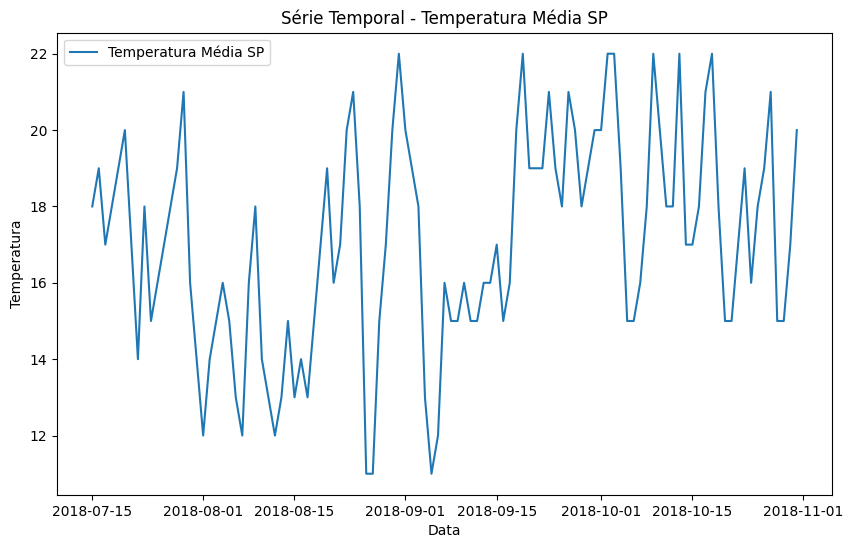

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['temp-media-sp'], label='Temperatura Média SP')
plt.title('Série Temporal - Temperatura Média SP')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose = seasonal_decompose(data['temp-media-sp'], model='additive', period=7)

In [ ]:
treino = data['temp-media-sp'][:int(0.8 * len(data))]
teste = data['temp-media-sp'][int(0.8 * len(data)):]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.0 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
modelo_auto = auto_arima(treino, seasonal=False, trace=True, suppress_warnings=True, stepwise=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=388.800, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=389.565, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=388.403, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=386.836, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=389.364, Time=1.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.964 seconds


In [ ]:
modelo = ARIMA(treino, order=modelo_auto.order)
modelo_ajustado = modelo.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
previsoes = modelo_ajustado.forecast(steps=len(teste))

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
teste_arredondado = np.round(teste)
previsoes_arredondadas = np.round(previsoes)
acuracia = accuracy_score(teste_arredondado, previsoes_arredondadas) * 100
print(f'A acurácia do modelo é: {acuracia:.2f}')

A acurácia do modelo é: 9.09


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(teste, previsoes)
rmse = np.sqrt(mse)
mae = mean_absolute_error(teste, previsoes)

In [ ]:
print(f'O erro médio quadrático é: {mse:.2f}')
print(f'A raiz do quadrático médio é: {rmse:.2f}')
print(f'O erro absoluto médio é: {mae:.2f}')

O erro médio quadrático é: 20.00
A raiz do quadrático médio é: 4.47
O erro absoluto médio é: 3.91
